In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
import pandas as pd

run_paths = [
   "./mlruns/117967985259146291/0320dd8c949d4fed92b098c9bc2ea4b4/metrics/", # SMALL SYN
    #"./mlruns/117967985259146291/fe82d5ea6ef14bfcaa382bac08eca665/metrics/", # BIG SYN

]

df_list = []  # List to store DataFrames from each run

for run_path in run_paths:
    data = {"epoch": []}  # Dictionary to store extracted data
    
    for file_name, col_name in [("loss", "loss"), ("eval_loss", "eval_loss")]:
        file_path = os.path.join(run_path, file_name)

        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                lines = file.readlines()

                # Extract epoch and loss values
                epochs, losses = [], []
                for line in lines:
                    parts = line.strip().split()  # Split by whitespace
                    if len(parts) == 3:
                        _, loss, epoch = parts
                        epochs.append(int(epoch))
                        losses.append(float(loss))
                
                data[col_name] = losses
                data["epoch"] = epochs

        else:
            print(f"File {file_name} not found in {run_path}")

    # Convert dictionary to DataFrame
    df_run = pd.DataFrame(data)

    # Add a column to indicate which run this data is from
    df_run["run"] = os.path.basename(os.path.dirname(run_path))  # Use run ID as identifier

    # Append the DataFrame to the list
    df_list.append(df_run)

# Concatenate all runs into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# ✅ Sort by epoch
df = df.sort_values(by="epoch").reset_index(drop=True)

print(df)



    

    epoch    loss  eval_loss      run
0      10  0.9689   1.000474  metrics
1      20  0.9717   0.939581  metrics
2      30  0.8772   0.881728  metrics
3      40  0.8636   0.831801  metrics
4      50  0.8238   0.785602  metrics
5      60  0.7316   0.744008  metrics
6      70  0.6801   0.710622  metrics
7      80  0.7185   0.681069  metrics
8      90  0.6954   0.655535  metrics
9     100  0.6445   0.634855  metrics
10    110  0.6257   0.616908  metrics
11    120  0.6223   0.601860  metrics
12    130  0.5858   0.588471  metrics
13    140  0.5554   0.577147  metrics
14    150  0.5578   0.566897  metrics
15    160  0.5275   0.557532  metrics
16    170  0.5260   0.548842  metrics
17    180  0.5155   0.540886  metrics
18    190  0.5104   0.533691  metrics
19    200  0.4832   0.526735  metrics
20    210  0.4930   0.520315  metrics
21    220  0.4906   0.514620  metrics
22    230  0.5010   0.509178  metrics
23    240  0.4717   0.504214  metrics
24    250  0.4960   0.499576  metrics
25    260  0

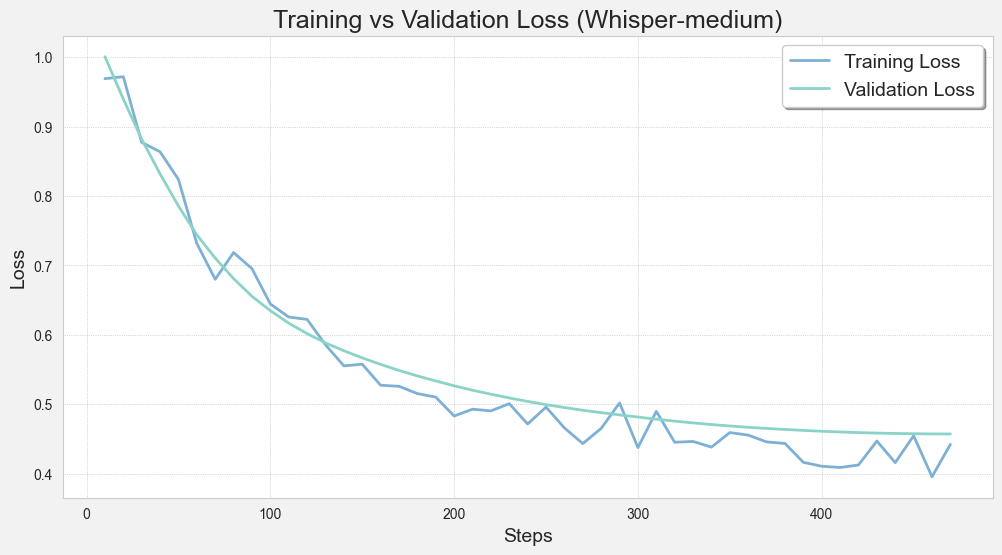

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style with a beige background
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), facecolor="#f2f2f2")  # Soft beige background

# Choose a beautiful font# Use a classic serif font
plt.rcParams["font.size"] = 10       # Slightly larger font

plt.plot(df["epoch"], df["loss"], label="Training Loss", 
         color="#7eb0d5", linewidth=2, alpha=1.0)
plt.plot(df["epoch"], df["eval_loss"], label="Validation Loss", 
         color="#8bd3c7", linewidth=2,  alpha=1.0)

plt.xlabel("Steps", fontsize=14)  # Increased label padding
plt.ylabel("Loss", fontsize=14)  # Increased label padding
plt.title("Training vs Validation Loss (Whisper-small)", fontsize=18)  # Increased title padding

plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)

plt.legend(fontsize=14, loc="upper right", frameon=True, shadow=True, facecolor="white")

plt.show()
